<a href="https://colab.research.google.com/github/WaelAboudi/Adult-Income/blob/main/Project_4_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 4 - Part 1 (Core)
`Student Name: Wael Aboudi`

##About the Data Set

###Briefing:

**Assignment:**

Choose a dataset from the choices below:

Datasets:

Adult income dataset

Car Insurance Data

Metabolic Syndrome Prediction - dataset by informatics-edu

Cirrhosis Prediction Dataset


When choosing your dataset, consider the following:



- What is the target? (You are required to complete a classification task for this project)
- What does one row represent? (A person? A business? An event? A product?)
- How many features does the data have?
- How many rows are in the dataset?
- What opportunities exist for dimensionality reduction or feature selection with this dataset?
- What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

**For this task:**

Choose a dataset from the provided list

Explore/clean the data

Exploratory Visualizations

Creating exploratory visualizations to understand your data and search for trends.

1- Choose a model

2- Preprocess data

3- Fit and evaluate a default model

4- Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4)

5- Add your observations in a Markdown: Do these features make sense based on the business case?

6- Create Explanatory Visualizations for the most important features.

7- Select 2 out of the top 10 features from your permutation importances

8- produce explanatory visualizations showing the relationship between the feature and the target.

* The purpose is to demonstrate key trends you found that will be of interest to a stakeholder.

1- These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).

2- These will be added to your readme in part 4

**Dictionary**



- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- class: >50K, <=50K

##diagnostic_plots

In [2]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 8))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')


    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')

    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)
    plt.title('Barplot')


    plt.show()

In [3]:
def categorical_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 10))


    # histogram
    plt.subplot(1,2, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')
    plt.xticks(rotation=45)


    # barplot
    plt.subplot(1,2, 2)
    sns.barplot(x = target, y = variable, data = df)
    plt.title('Barplot')


    plt.show()

##Custom Functions

###Summarize

In [4]:
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
                        'dtype':df.dtypes,
                        '# null': df.isna().sum(),
                        'null (%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),
                        "min":df.min(),
                        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()


###Get_Importances

In [5]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):

    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)

    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances

###plot_importance

In [6]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

###get_color_dict

In [7]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

###plot_importance_color

In [8]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6),
                          color_dict=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

###annotate_hbars

In [9]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

###plot_coeffs

In [10]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False):
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')

    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"

    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
           ylabel='Feature Names',
           title=title)
    ax.axvline(0, color='k')

    ## return ax in case want to continue to update/modify figure
    return ax

###classification_metrics

In [11]:
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict


###evaluate_classification

In [12]:
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

##Imports

In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set text displays for sklearn
from sklearn import set_config
set_config(display='text')
set_config(transform_output='pandas')
## Using pd.set_option to display more columns
pd.set_option('display.max_columns',50)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fav_style = ('ggplot','tableau-colorblind10')
fav_context  = {'context':'notebook', 'font_scale':1.2}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print("Path to dataset files:", path)

100%|██████████| 652k/652k [00:00<00:00, 1.09MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/wenruliu/adult-income-dataset/versions/2


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
df=pd.read_csv('/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/03-DataEnrichment/Week09/Data/adult.csv')

##Read, Analyze, and prepare for modeling

In [19]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [21]:
df['income'].value_counts()

,count
income,
<=50K,37155
>50K,11687


- I will choose income as my target
- after initial inspection i found out the following:
  - the data set has 48842 instances and 15 features
  - 9 categorical features and 6 numerical
  - no Null values found
  

In [22]:
df.isna().sum().sum()

0

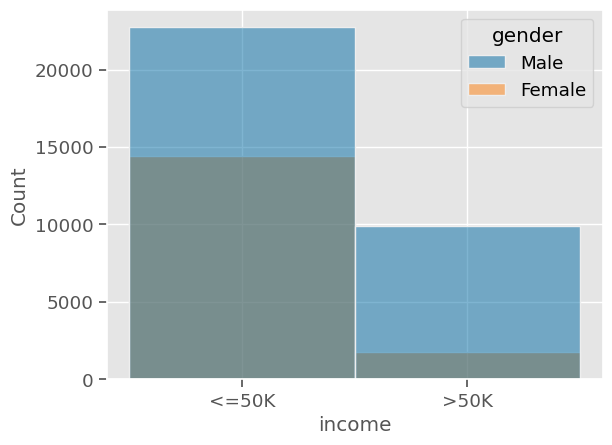

In [23]:
# visual distribution of income
ax = sns.histplot(data=df, x='income', hue='gender')

###Examining Categorical features

In [24]:
cat_cols=df.select_dtypes(include='object').columns

In [25]:
for col in cat_cols:

  print(df[col].value_counts())
  print()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial   

In [26]:
df=df.replace('?', np.nan)
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [27]:
for col in cat_cols:

  print(df[col].value_counts())
  print()

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64

marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64

occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales             

- Since United states accounts for around 90% od the instances i will add the other countries under the Non-US mask

In [28]:
for country in df['native-country']:
  if country != 'United-States':
    df['native-country'] = df['native-country'].replace(country,'Non-US')

In [29]:
df['native-country'].value_counts()

,count
native-country,
United-States,41292
Non-US,3930


- i will drop education and relationship features since there's no sense to keep it while we have education_num and marital-status features

In [30]:
df=df.drop(columns=['education','relationship'])

###Examining Numerical features

In [31]:
num_cols=df.select_dtypes(include='number').columns

In [32]:
df[num_cols].describe().round(2)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.00,45222.00,45222.00,45222.00,45222.00,45222.00
mean,38.55,189734.73,10.12,1101.43,88.60,40.94
std,13.22,105639.20,2.55,7506.43,404.96,12.01
min,17.00,13492.00,1.00,0.00,0.00,1.00
25%,28.00,117388.25,9.00,0.00,0.00,40.00
50%,37.00,178316.00,10.00,0.00,0.00,40.00
75%,47.00,237926.00,13.00,0.00,0.00,45.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00


In [33]:
corr=df[num_cols].corr()
corr

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.075792,0.037623,0.079683,0.059351,0.101992
fnlwgt,-0.075792,1.000000,-0.041993,-0.004110,-0.004349,-0.018679
educational-num,0.037623,-0.041993,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,-0.004110,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,-0.004349,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,-0.018679,0.146206,0.083880,0.054195,1.000000


- i will drop fnlwgt feature since we don't know what is it

In [34]:
df=df.drop(columns='fnlwgt')

In [35]:
for num in df['educational-num']:
  if num == 13:
    df['educational-num'] = df['educational-num'].replace(num,'BA')
  if num == 14:
    df['educational-num'] = df['educational-num'].replace(num,'MA')
  if num == 15:
    df['educational-num'] = df['educational-num'].replace(num,'Prof-school')
  if num == 16:
    df['educational-num'] = df['educational-num'].replace(num,'Phd')
  if num>=10 and num<=12:
    df['educational-num'] = df['educational-num'].replace(num,'College & Assoc')
  else:
    df['educational-num'] = df['educational-num'].replace(num,'High School and lower education')

In [36]:
df['educational-num'].value_counts()

,count
educational-num,
High School and lower education,20444
College & Assoc,13365
BA,7570
MA,2514
Prof-school,785
Phd,544


##Visuals

In [37]:
num_cols=df.select_dtypes(include='number').columns
num_cols

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

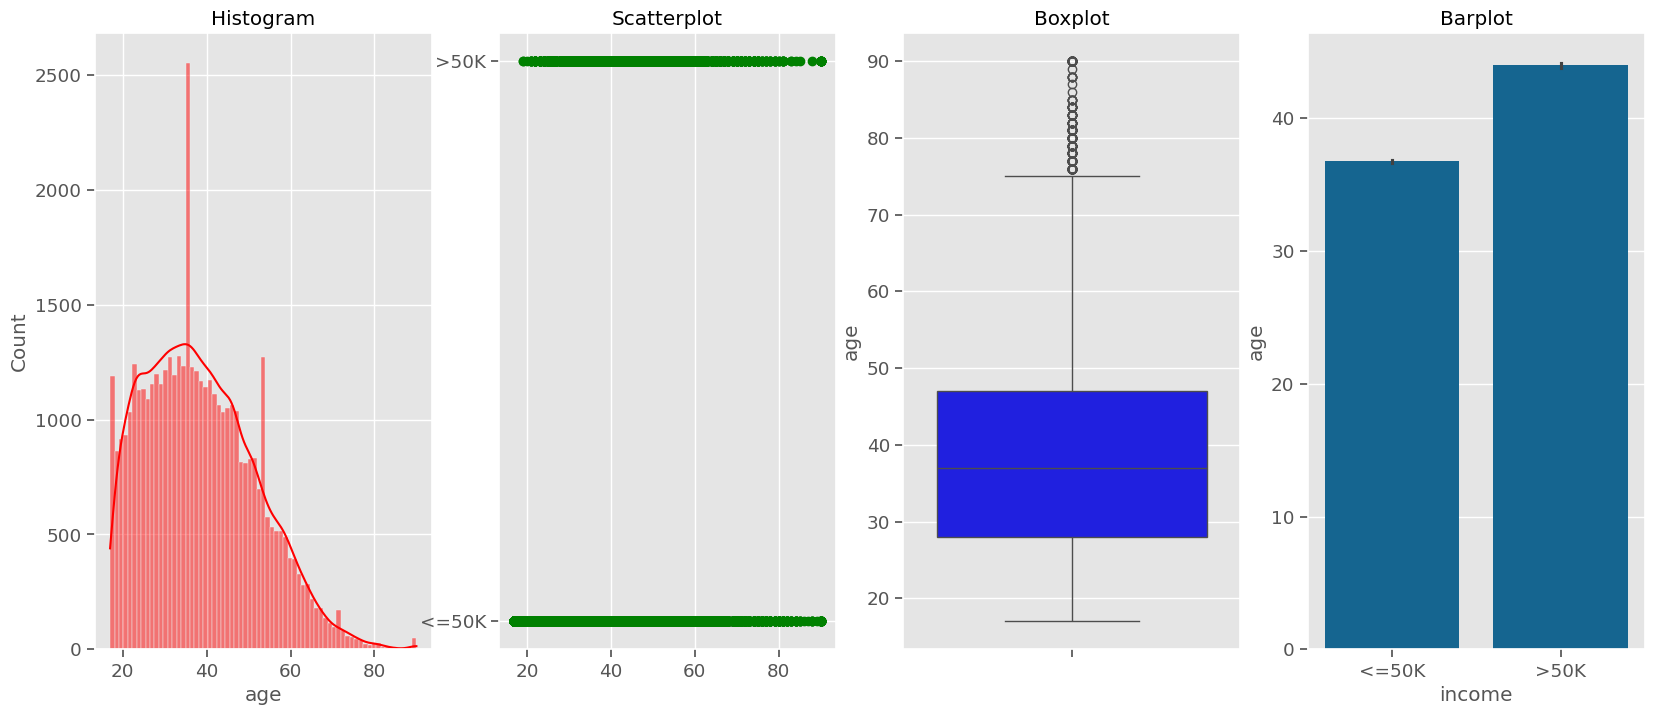

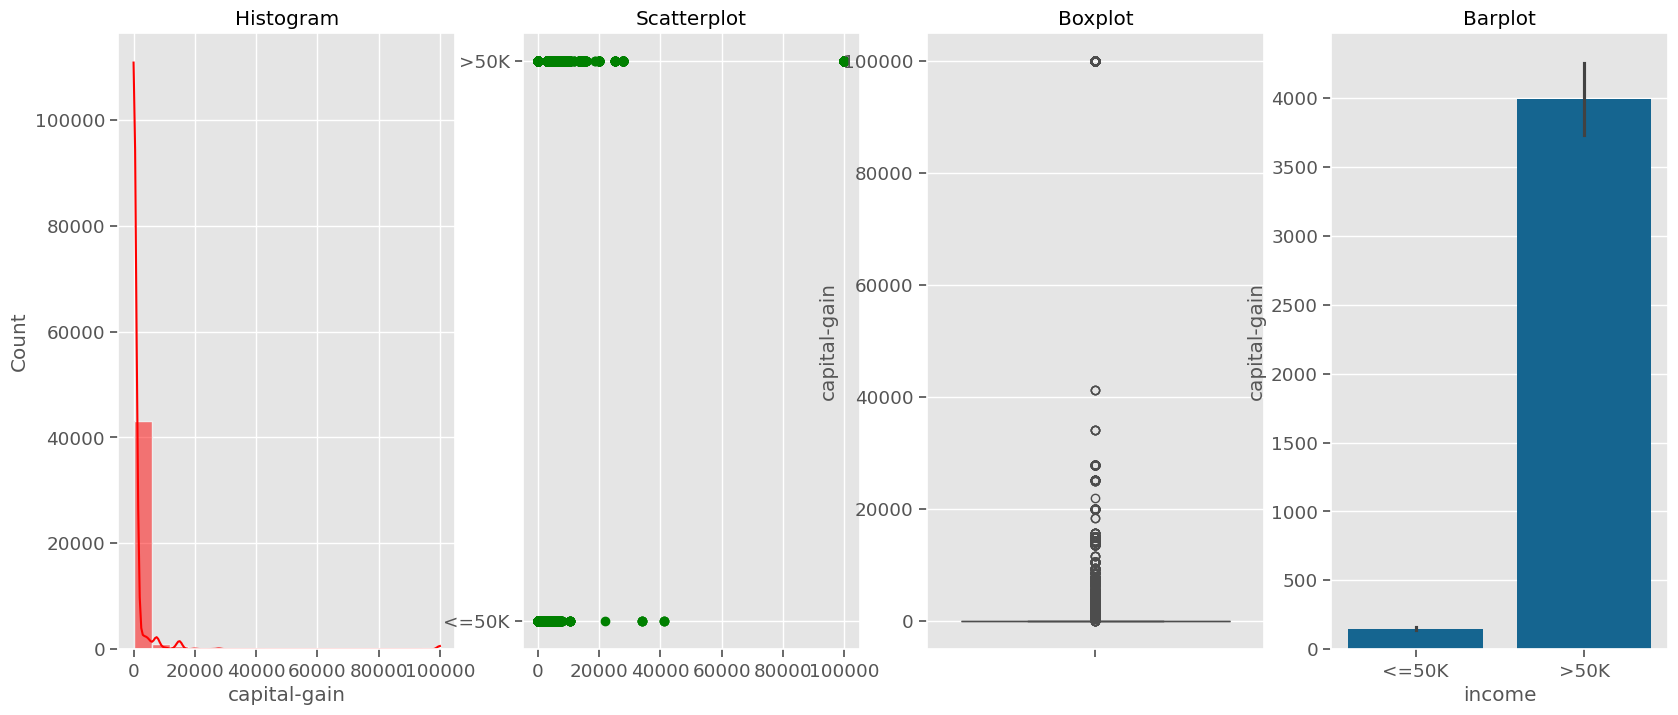

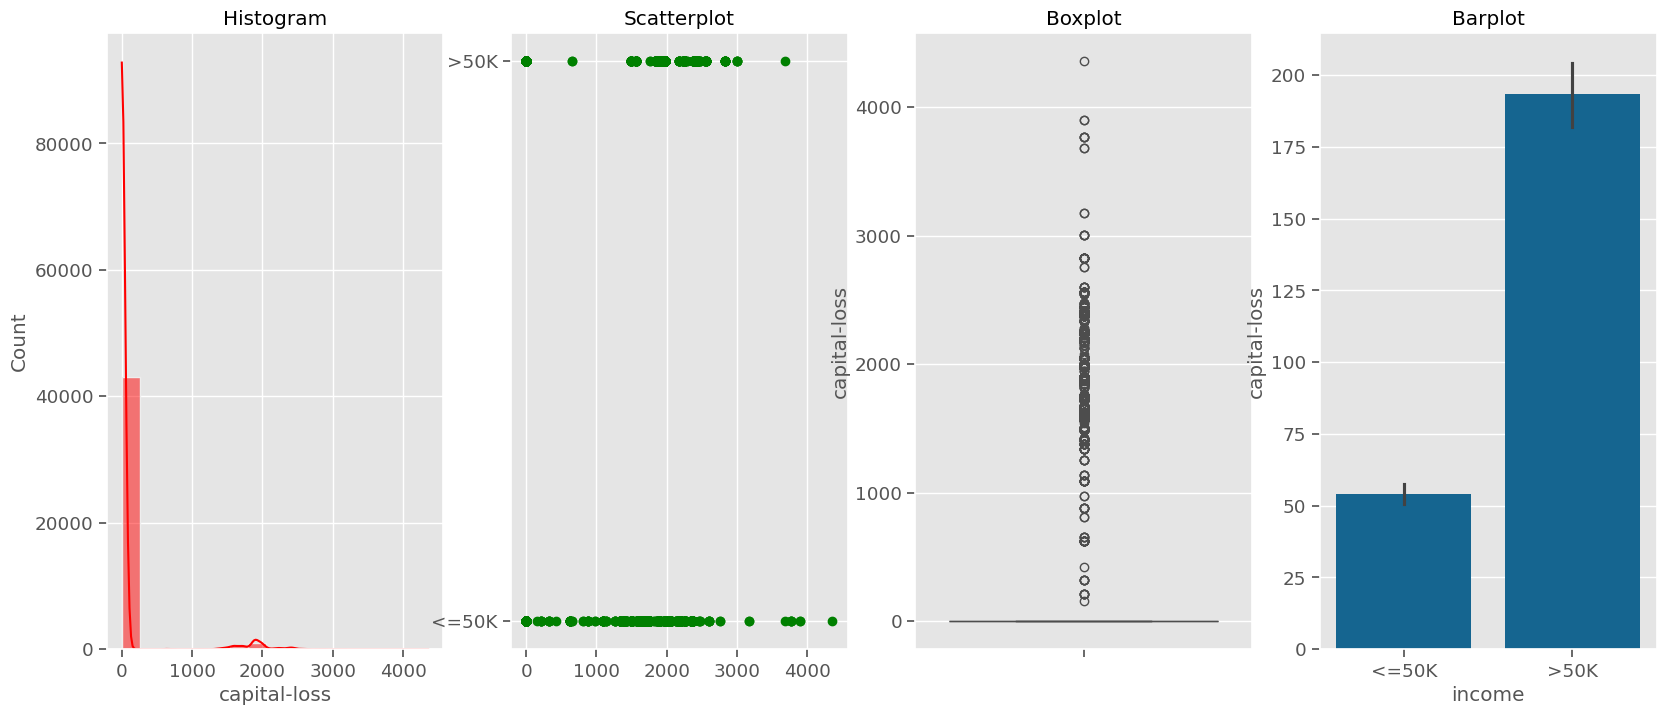

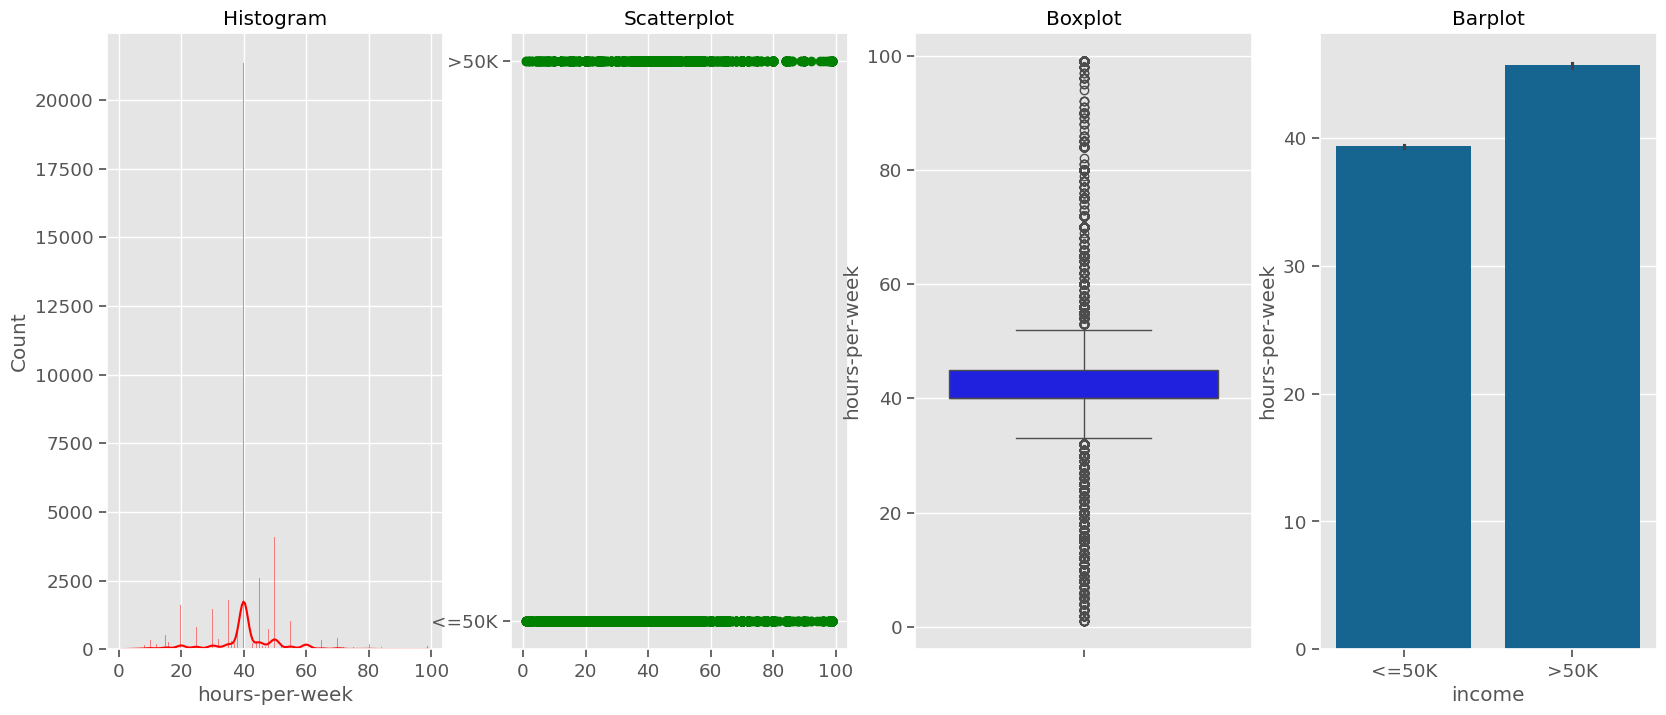

In [38]:
for col in num_cols:
    diagnostic_plots(df,col,'income')

In [39]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['workclass', 'educational-num', 'marital-status', 'occupation', 'race',
       'gender', 'native-country', 'income'],
      dtype='object')

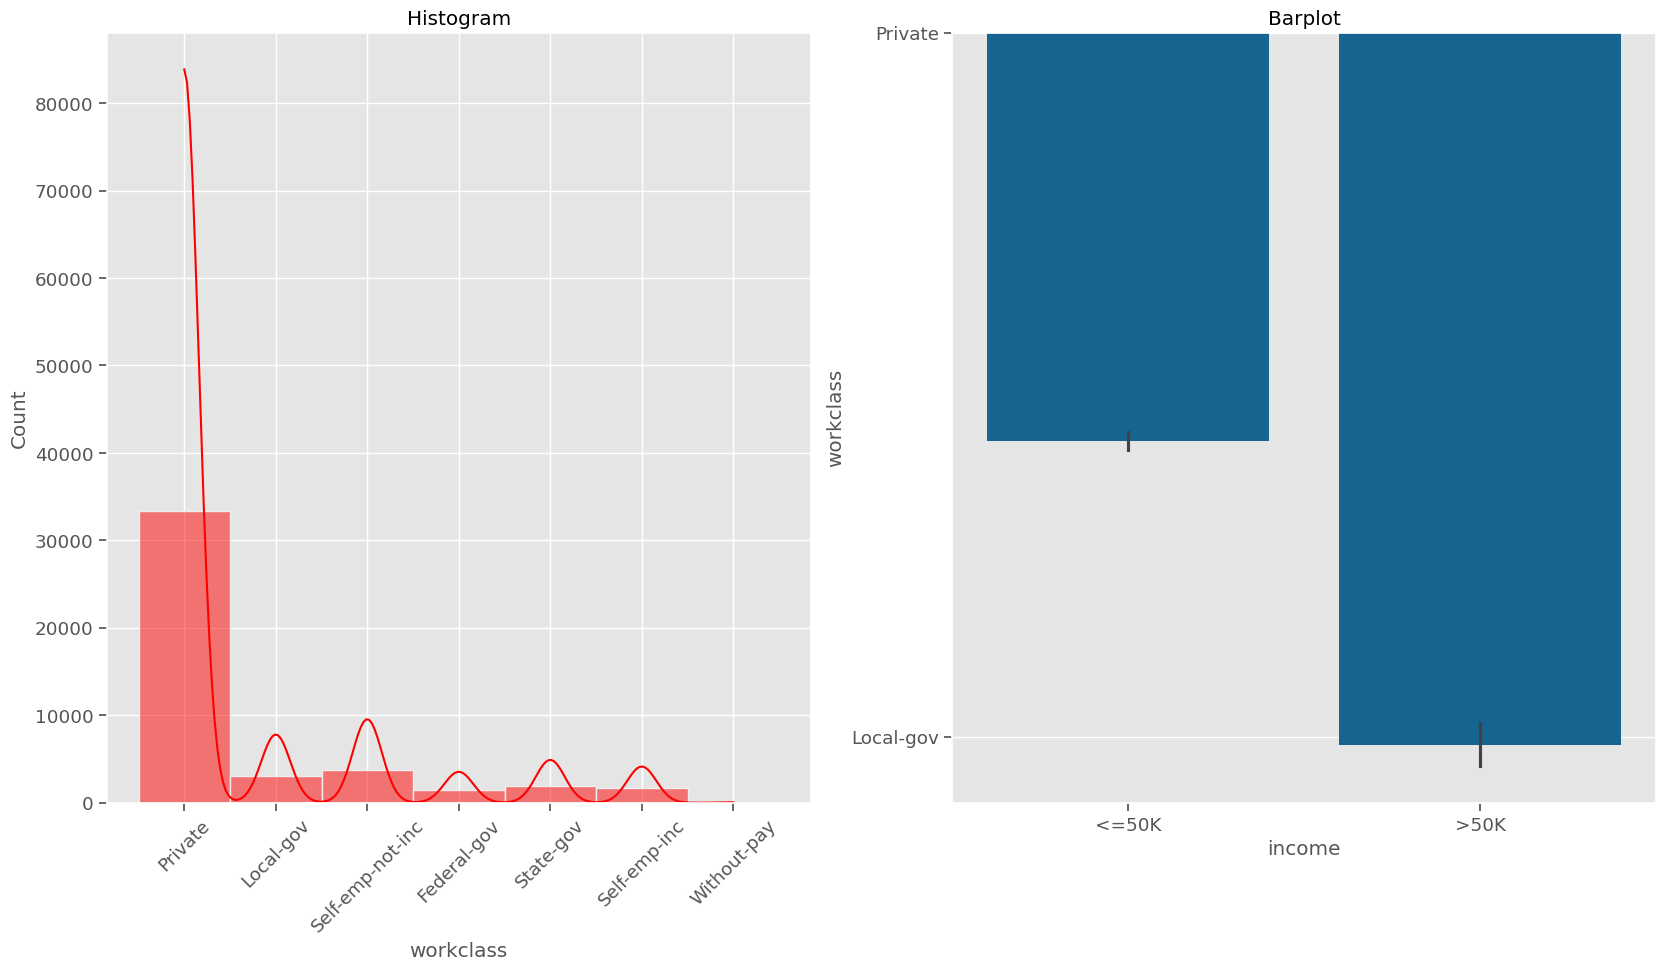

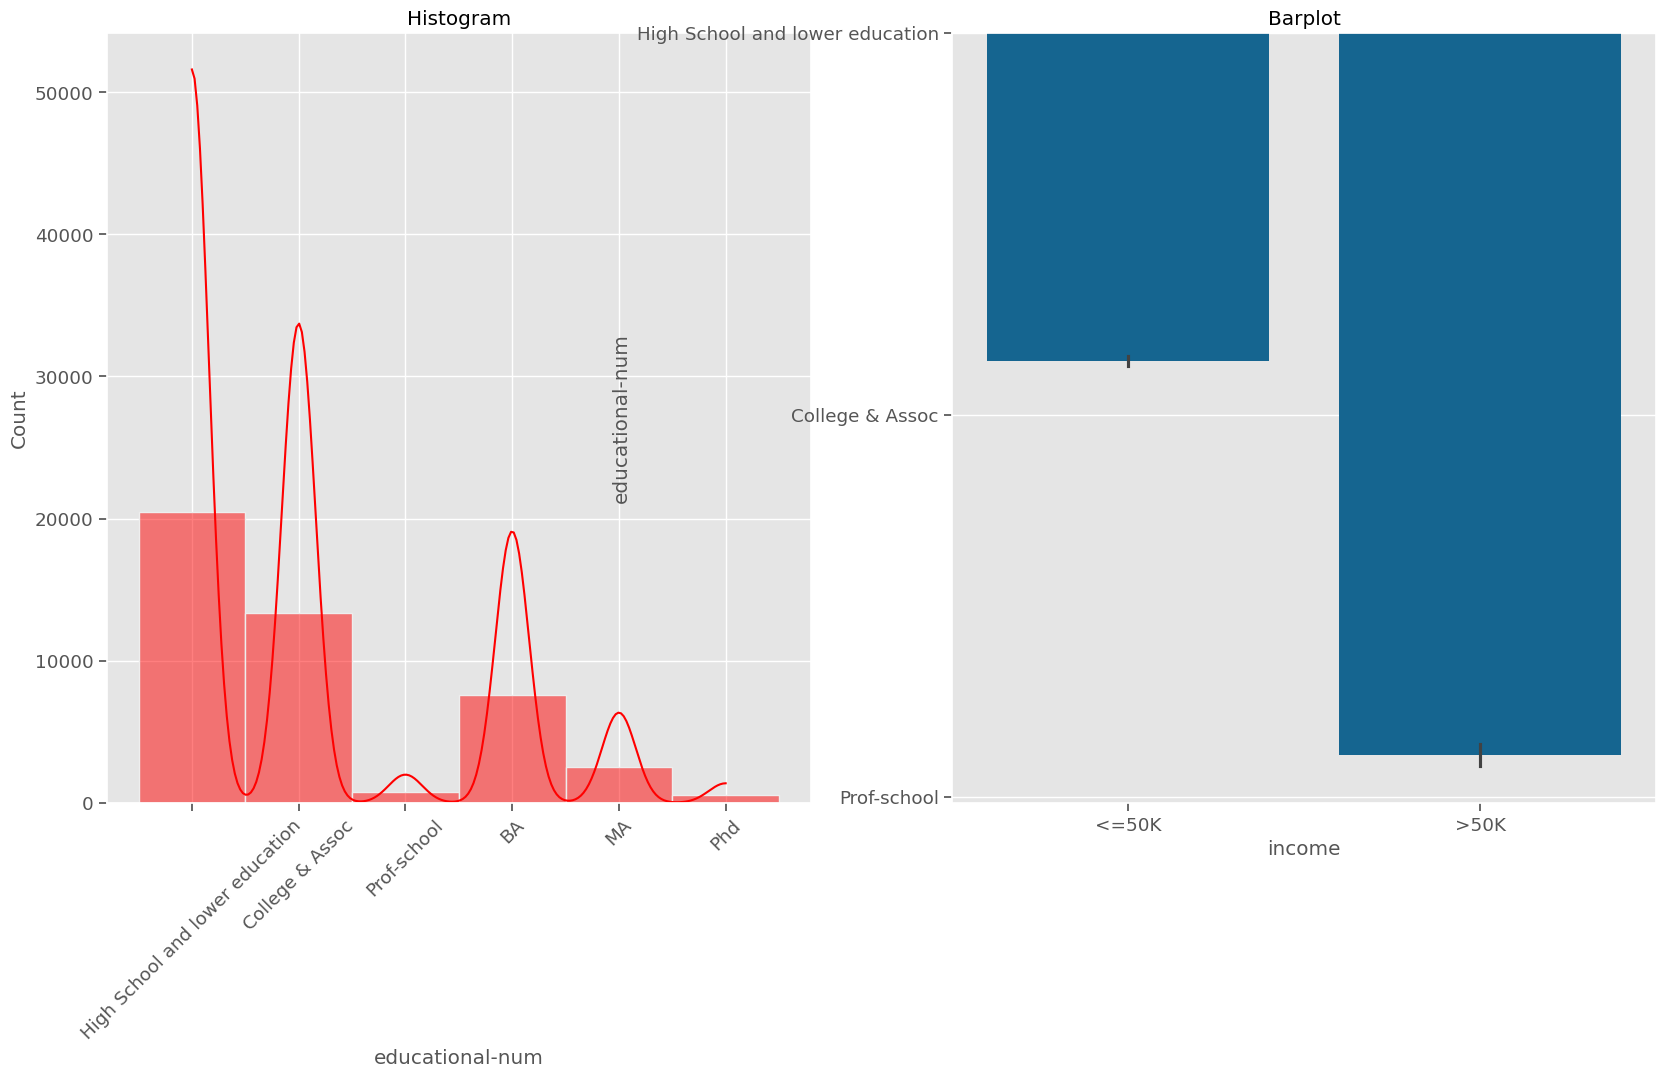

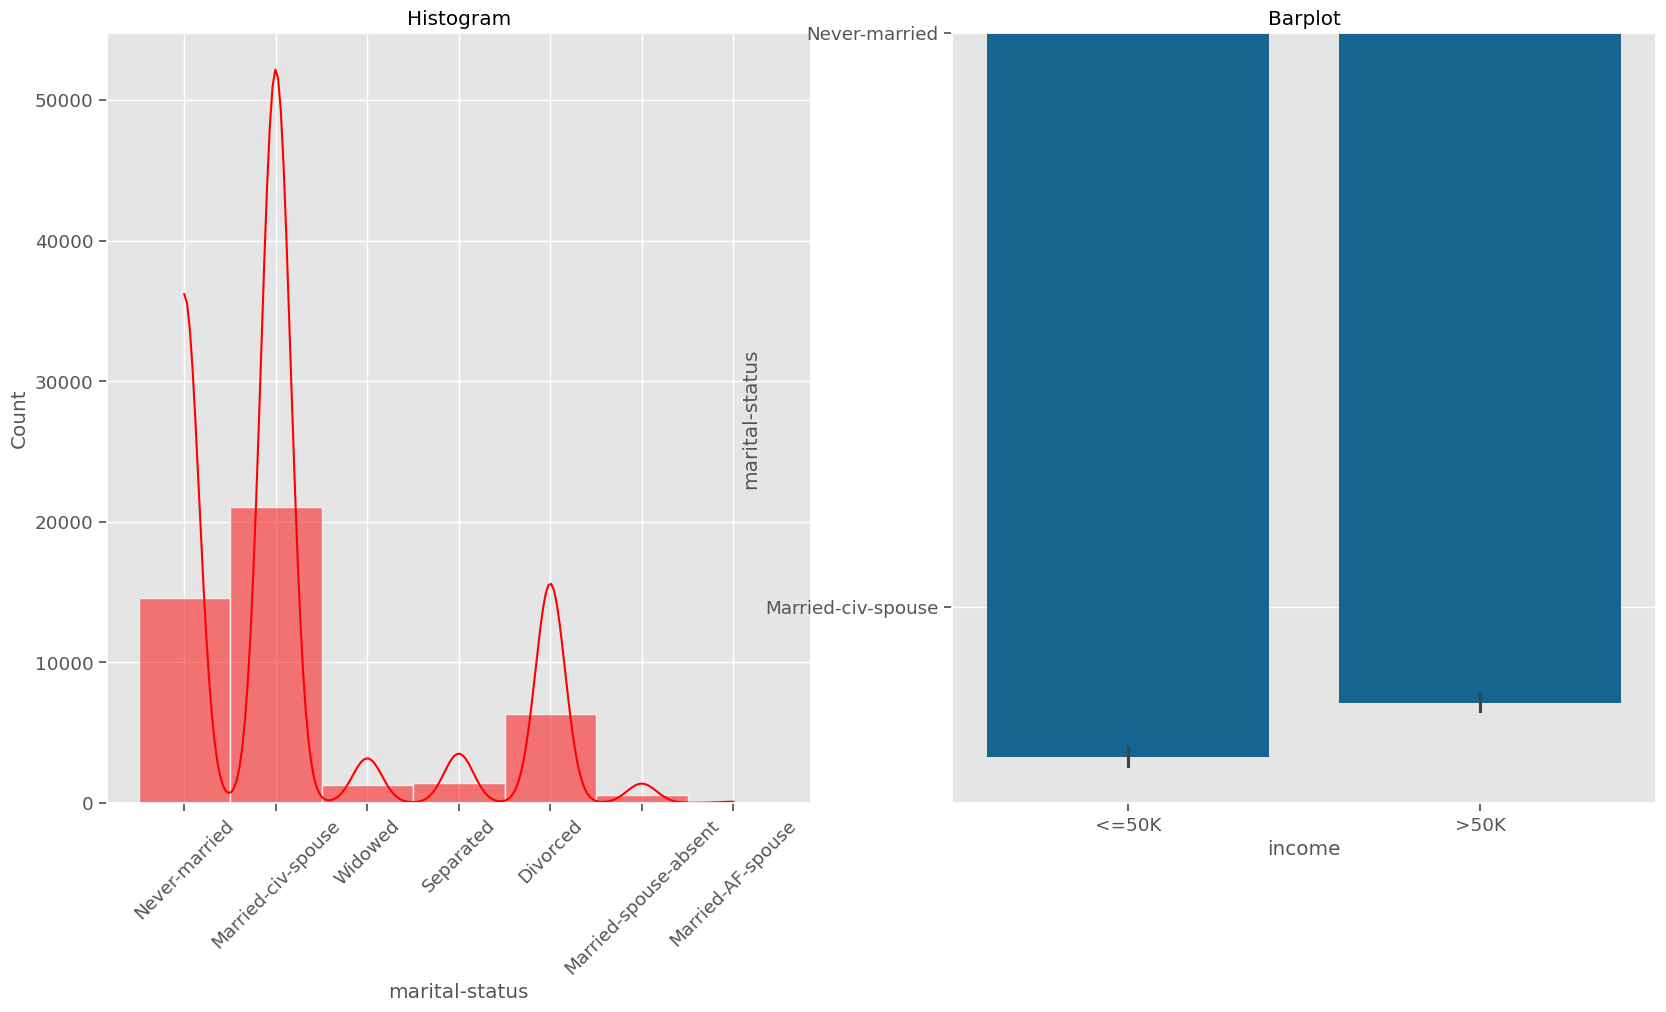

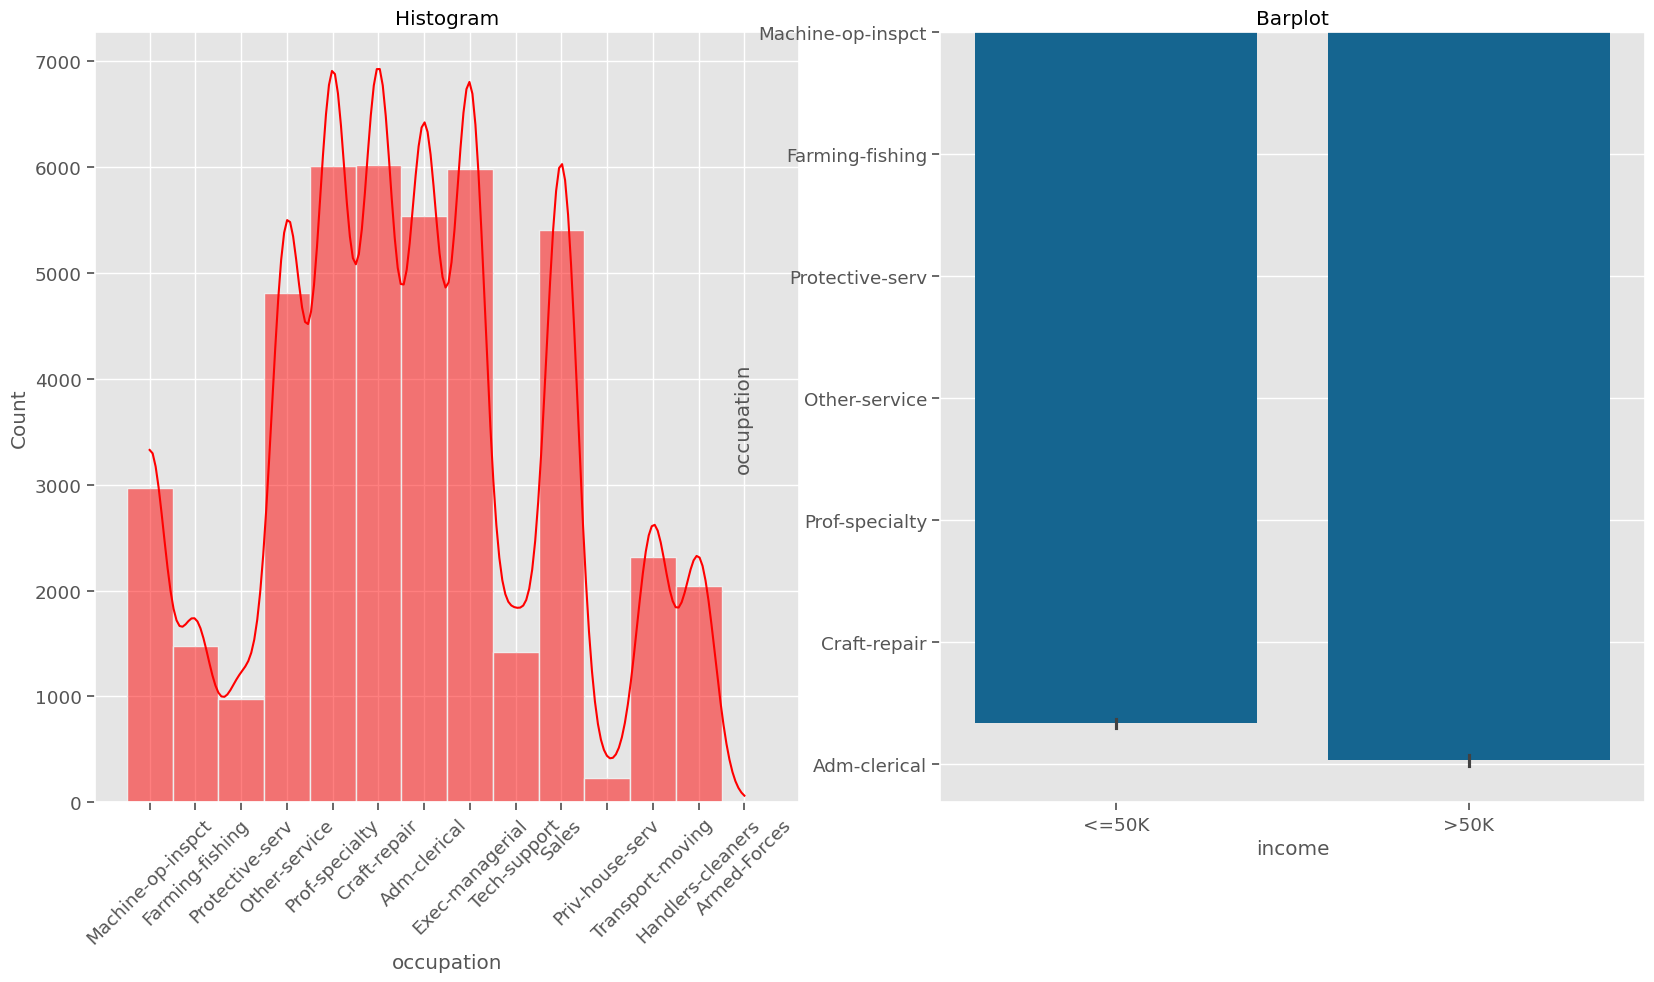

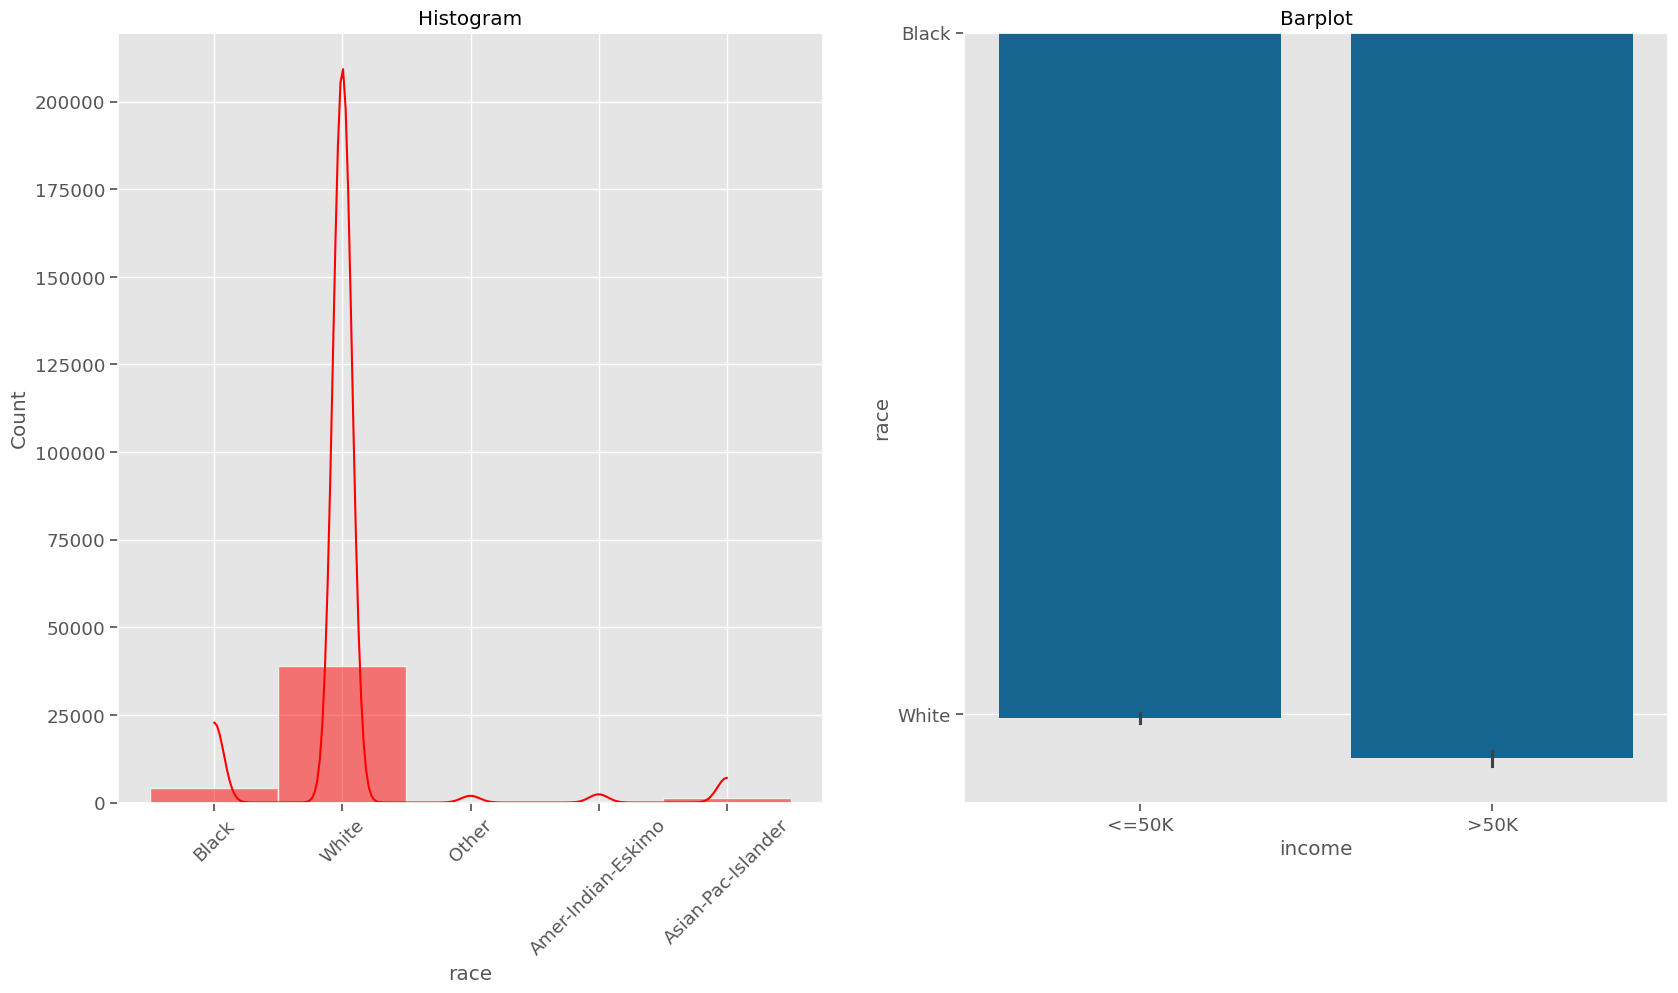

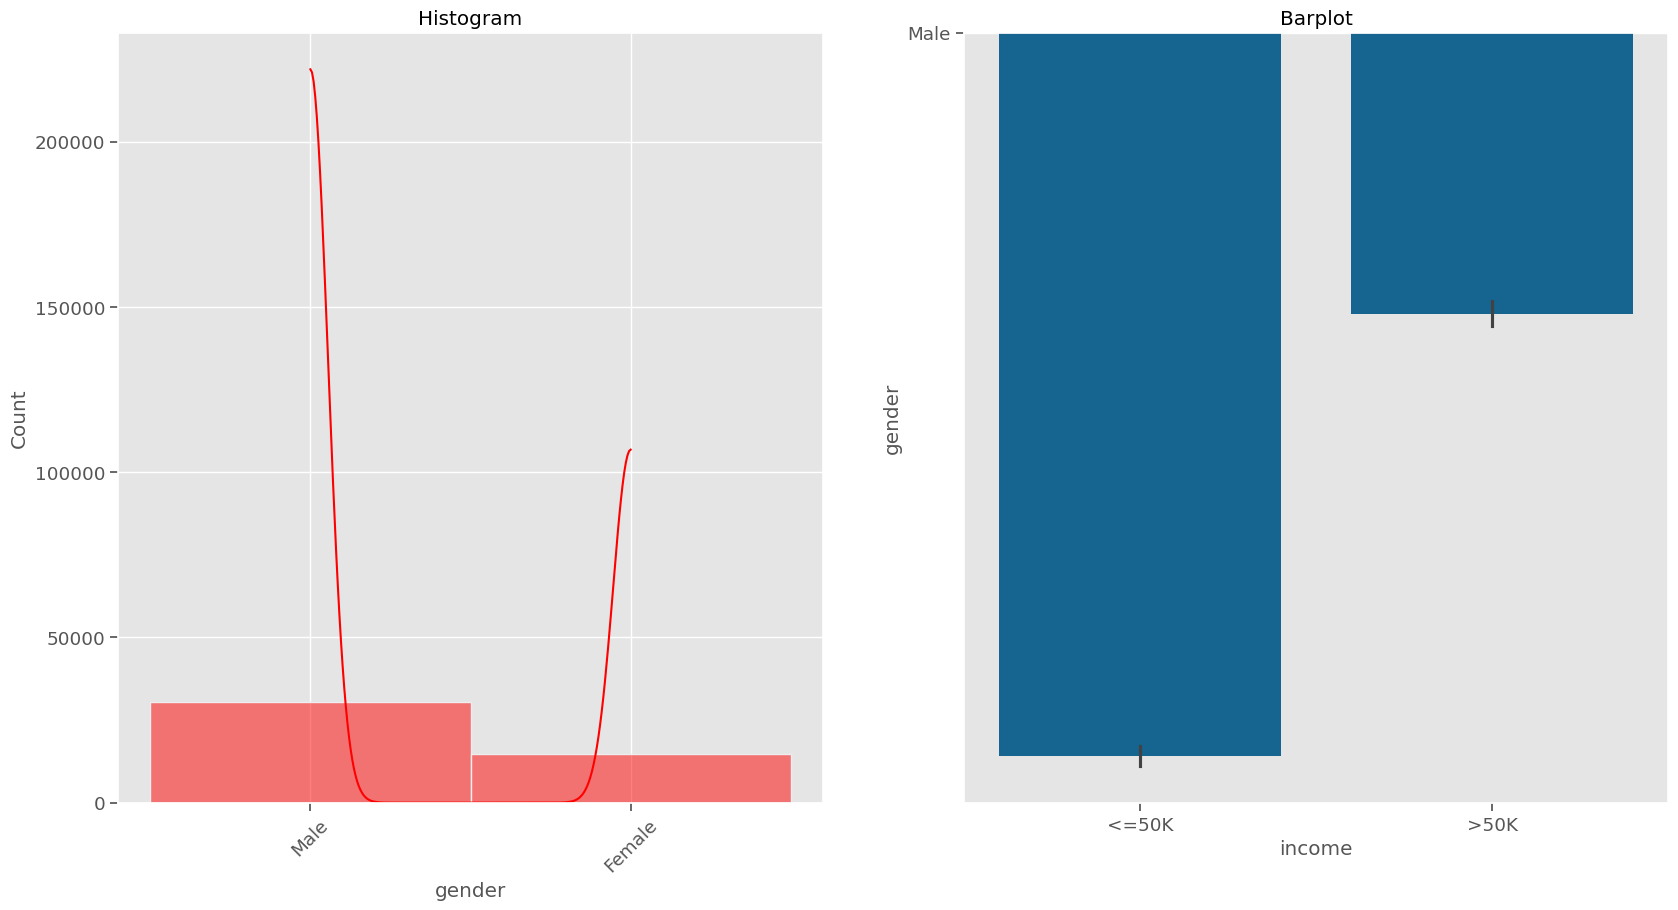

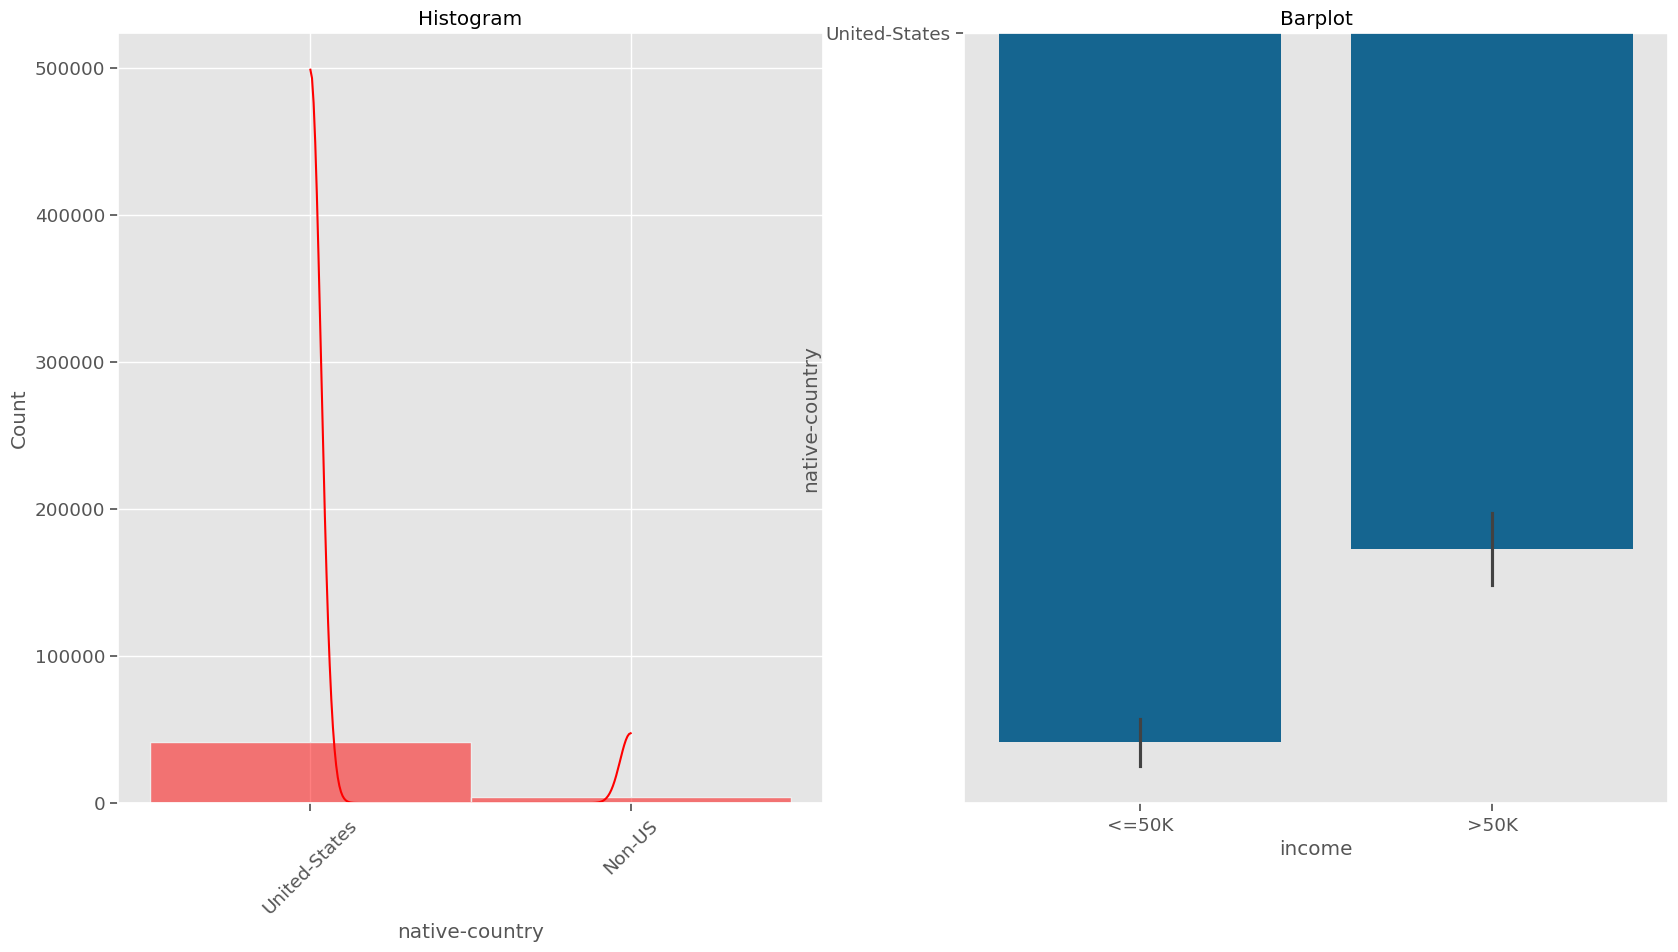

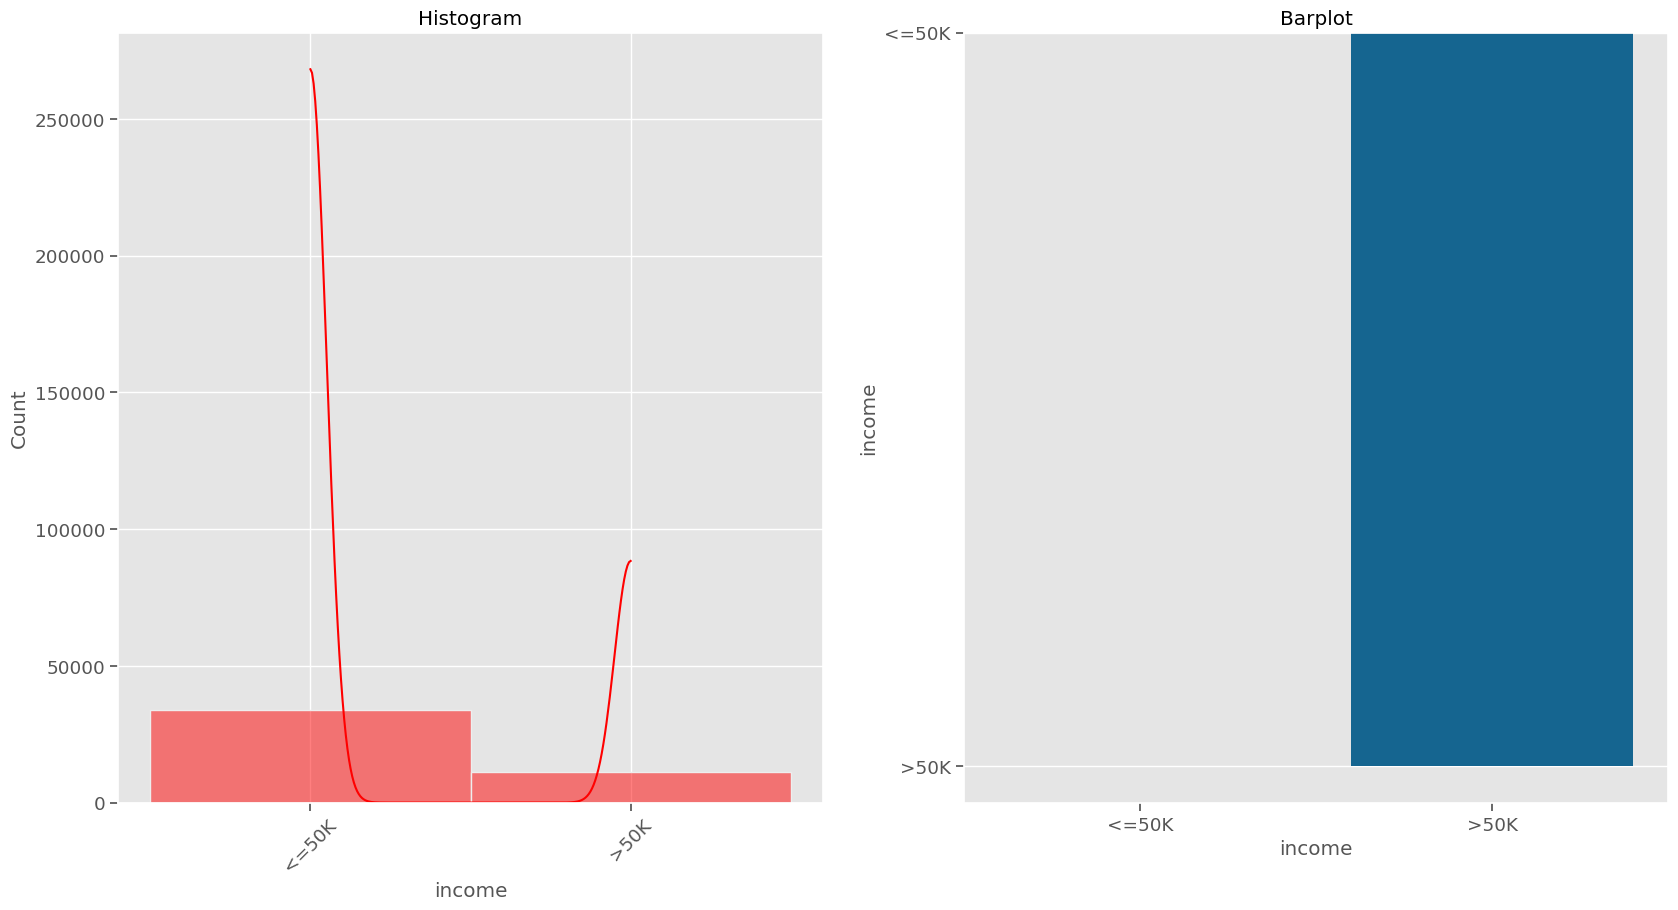

In [40]:
for col in cat_cols:
    categorical_plots(df,col,'income')

##Train Test Split

We must make sure to remove the original target that we used to calculate the income category.

In [41]:
# Make x and y variables
y = df['income']
X = df.drop(columns=['income','capital-gain','capital-loss'])
# train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)

##Preprocessing

###Categorical Pipeline

In [42]:
# make list of categorical columns
ohe_cols = X_train.select_dtypes('object').columns

# instantiate preprocessors
impute_constant = SimpleImputer(strategy='constant', fill_value= 'MISSING')
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# make pipeline for categorical data
ohe_pipe = make_pipeline(impute_constant, ohe_encoder)

# make tuple for column transformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

ohe_cols

Index(['workclass', 'educational-num', 'marital-status', 'occupation', 'race',
       'gender', 'native-country'],
      dtype='object')

###Numeric Pipeline

In [43]:
# make list of numeric columns
num_cols = X_train.select_dtypes('number').columns

# instantiate preproecessors
impute_mean =(SimpleImputer(strategy='mean'))

# make pipeline for numerical data
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

# make tuple for column transfomer
num_tuple = ('numeric', num_pipe, num_cols)

num_cols

Index(['age', 'hours-per-week'], dtype='object')

###Preprocessor Object

In [44]:
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple], verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['age', 'hours-per-week'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['workclass', 'educational-num', 'marital-status', 'occupation', 'race',
       'gender', 'native-country'],
      dtype='object'))],
                  verbose_fea

In [45]:
preprocessor.fit(X_train)
X_train_tf=preprocessor.transform(X_train)
X_test_tf=preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()

##RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state= SEED)
rf_pipe=make_pipeline(preprocessor, rf_clf)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.96      0.98      0.97     25481
        >50K       0.93      0.89      0.91      8435

    accuracy                           0.95     33916
   macro avg       0.95      0.93      0.94     33916
weighted avg       0.95      0.95      0.95     33916



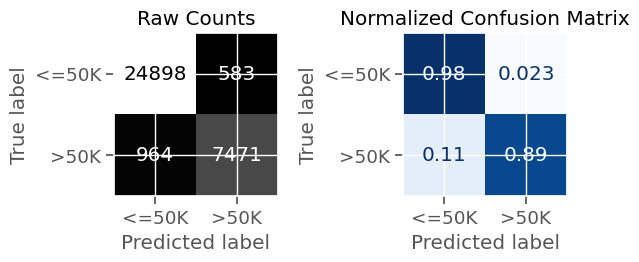


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.86      0.89      0.88      8533
        >50K       0.63      0.55      0.58      2773

    accuracy                           0.81     11306
   macro avg       0.74      0.72      0.73     11306
weighted avg       0.80      0.81      0.80     11306



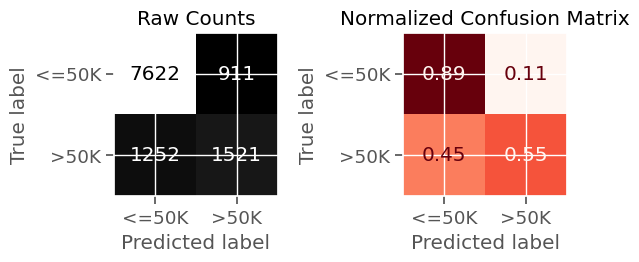

In [47]:
# fit random forest
rf_pipe.fit(X_train,y_train)
# evaluate with custom function
evaluate_classification(rf_pipe,X_train, y_train, X_test,y_test)

- We have an overall accuracy of .81, which isn't bad. However, our task is to identify the Workers who will gain more than 50K.
  - The Recall score for True is .55. This means that out of all of the Workers who will gain over 50K, our model is identifying 55% of them correctly.

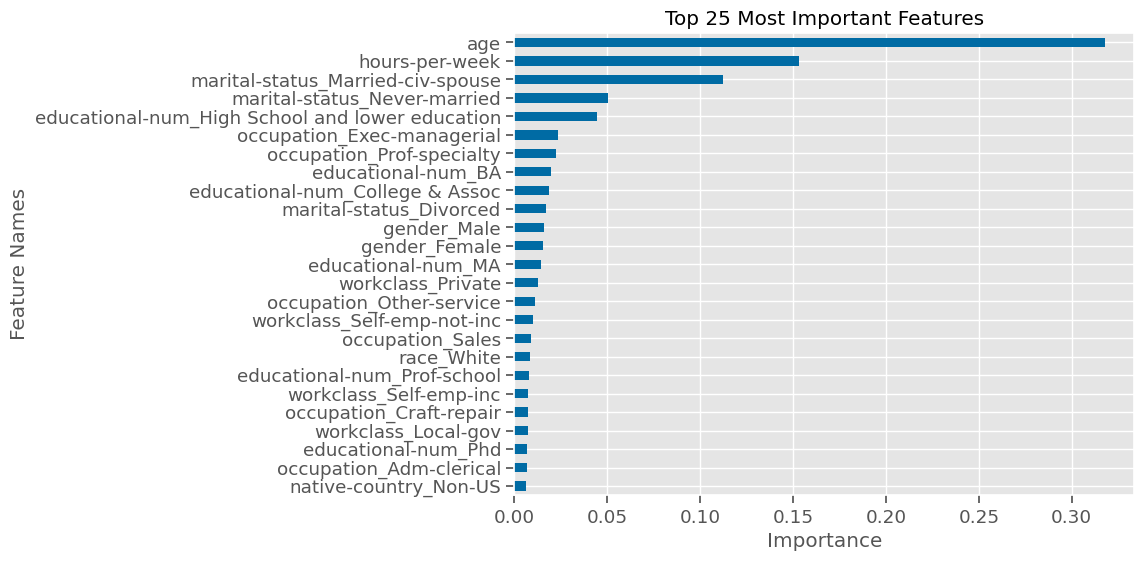

In [48]:
# Obtain importances
rf_importances = get_importances(rf_clf)
# Plot importances with custom function
ax = plot_importance(rf_importances,top_n=25)

In [49]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rf_clf,X_train_tf,y_train,n_jobs=-1,n_repeats=5, random_state = SEED)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [50]:
# getting the colors for the top 5 important rf features
colors_rf = get_color_dict(rf_importances,top_n=5)


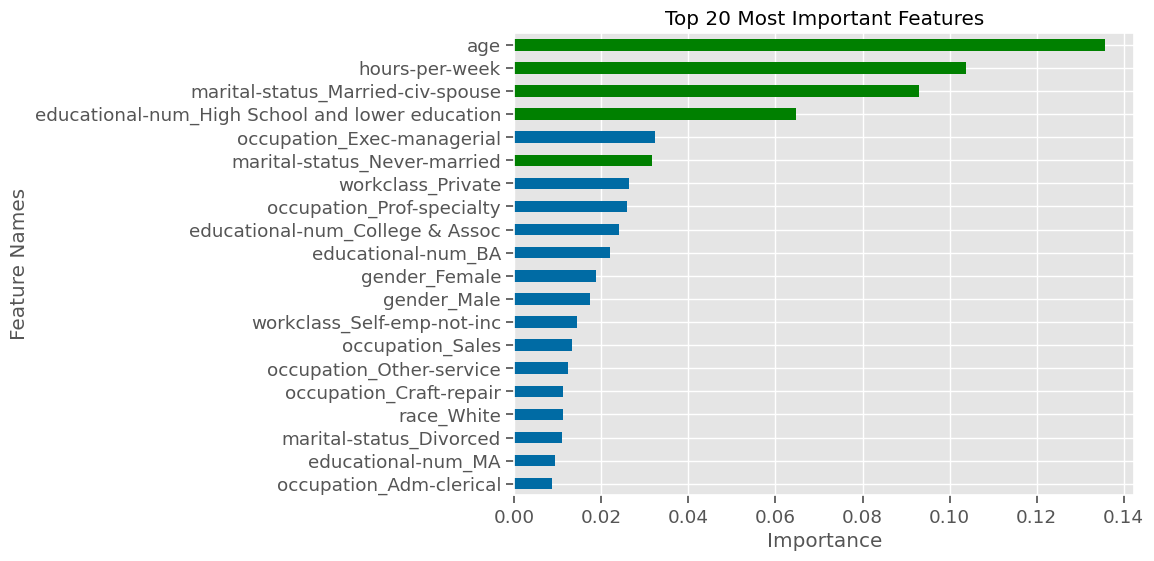

In [51]:
# make mean importances into a series
rf_perm_importances = pd.Series(r['importances_mean'],index=X_train_tf.columns,
                           name = 'permutation importance')
# sort before plotting
rf_perm_importances = rf_perm_importances.sort_values(ascending=False)
# plot with custom function
plot_importance_color(rf_perm_importances,color_dict=colors_rf,top_n=20);

In [52]:
rf_perm_importances

,permutation importance
age,0.135641
hours-per-week,0.103756
marital-status_Married-civ-spouse,0.092865
educational-num_High School and lower education,0.064778
occupation_Exec-managerial,0.032368
marital-status_Never-married,0.031531
workclass_Private,0.026377
occupation_Prof-specialty,0.025946
educational-num_College & Assoc,0.024030
educational-num_BA,0.022025


- As we can see above, the first four of the features are the same as the random forest's top features, the top two features are:
  - age
- it means the higher the age gets the more likely to gain more than 50K
  - hours-per-week
- it means the more hours they work the more likely to fall in th more than 50K segment

In [53]:
# Select top 5 features
top_features = rf_perm_importances.head(5).index


In [54]:
top_features

Index(['age', 'hours-per-week', 'marital-status_Married-civ-spouse',
       'educational-num_High School and lower education',
       'occupation_Exec-managerial'],
      dtype='object')

In [55]:
X_train_selected = X_train_tf[top_features]
X_test_selected = X_test_tf[top_features]

rf_clf.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=321)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90     25481
        >50K       0.73      0.66      0.69      8435

    accuracy                           0.85     33916
   macro avg       0.81      0.79      0.80     33916
weighted avg       0.85      0.85      0.85     33916



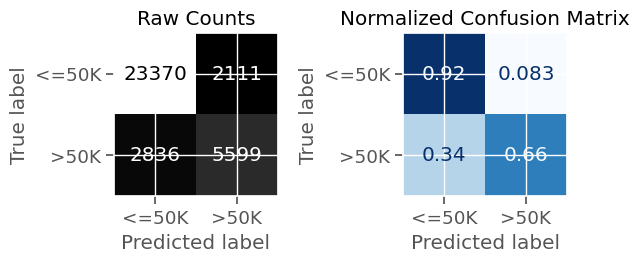


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.86      0.88      0.87      8533
        >50K       0.61      0.55      0.58      2773

    accuracy                           0.80     11306
   macro avg       0.73      0.72      0.72     11306
weighted avg       0.80      0.80      0.80     11306



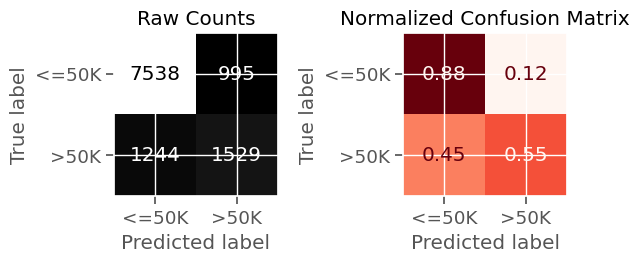

In [56]:
evaluate_classification(rf_clf,X_train_selected, y_train, X_test_selected,y_test)

##Visualization of top 2 features with target

##Age vs. Income

Text(0.5, 1.0, 'Barplot')

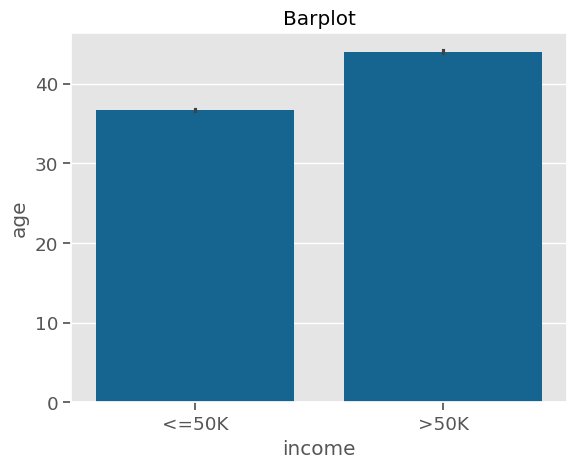

In [57]:
    plt.subplot()
    sns.barplot(x = 'income', y = 'age', data = df)
    plt.title('Barplot')

- the visualization illustrates the strong relationship between Age and Income segment, the older the worker gets the more likely he falls in the over 50K segment and this is logic since over age the experience gets higher and as a result the work effieciency and compensation.

##hours-per-week vs income

Text(0.5, 1.0, 'Scatterplot')

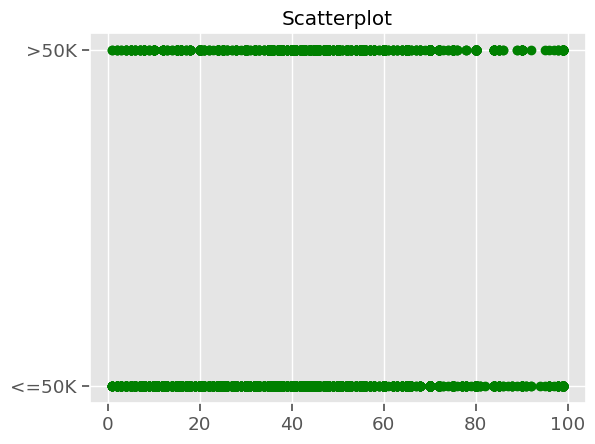

In [58]:
    plt.subplot()
    plt.scatter(df['hours-per-week'],df['income'],color = 'g')
    plt.title('Scatterplot')

- the visualzation illustrates how week work hours is so decicive in income category. However in some cases working hours is not necesserily needed due to make more income given the different work types

#Project 4 - Part 2

- I will choose to work with PCA

## At first, let's explore our data

In [59]:
df.head()

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,High School and lower education,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,High School and lower education,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,College & Assoc,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,College & Assoc,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
5,34,Private,High School and lower education,Never-married,Other-service,White,Male,0,0,30,United-States,<=50K


In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33916 entries, 17438 to 34268
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              33916 non-null  int64 
 1   workclass        33916 non-null  object
 2   educational-num  33916 non-null  object
 3   marital-status   33916 non-null  object
 4   occupation       33916 non-null  object
 5   race             33916 non-null  object
 6   gender           33916 non-null  object
 7   hours-per-week   33916 non-null  int64 
 8   native-country   33916 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.6+ MB


In [61]:
y_train.value_counts(normalize=True)

,proportion
income,
<=50K,0.751297
>50K,0.248703


In [62]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11306 entries, 39606 to 12955
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              11306 non-null  int64 
 1   workclass        11306 non-null  object
 2   educational-num  11306 non-null  object
 3   marital-status   11306 non-null  object
 4   occupation       11306 non-null  object
 5   race             11306 non-null  object
 6   gender           11306 non-null  object
 7   hours-per-week   11306 non-null  int64 
 8   native-country   11306 non-null  object
dtypes: int64(2), object(7)
memory usage: 883.3+ KB


In [63]:
y_test.value_counts(normalize=True)

,proportion
income,
<=50K,0.754732
>50K,0.245268


##Scale the data

In [64]:
preprocessor.fit(X_train)
X_train_tf=preprocessor.transform(X_train)
X_test_tf=preprocessor.transform(X_test)

In [65]:
X_train_scaled=StandardScaler().fit_transform(X_train_tf)
X_test_scaled=StandardScaler().fit_transform(X_test_tf)

In [66]:
X_train_scaled.describe().round(2)

,age,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,educational-num_BA,educational-num_College & Assoc,educational-num_High School and lower education,educational-num_MA,educational-num_Phd,educational-num_Prof-school,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_Non-US,native-country_United-States
count,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00,33916.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.64,-3.34,-0.18,-0.27,-1.68,-0.19,-0.30,-0.21,-0.02,-0.45,-0.65,-0.91,-0.24,-0.11,-0.13,-0.40,-0.03,-0.94,-0.11,-0.69,-0.18,-0.17,-0.37,-0.02,-0.39,-0.39,-0.18,-0.22,-0.27,-0.34,-0.07,-0.39,-0.15,-0.37,-0.18,-0.23,-0.10,-0.17,-0.32,-0.09,-2.47,-0.69,-1.44,-0.31,-3.23
25%,-0.80,-0.08,-0.18,-0.27,-1.68,-0.19,-0.30,-0.21,-0.02,-0.45,-0.65,-0.91,-0.24,-0.11,-0.13,-0.40,-0.03,-0.94,-0.11,-0.69,-0.18,-0.17,-0.37,-0.02,-0.39,-0.39,-0.18,-0.22,-0.27,-0.34,-0.07,-0.39,-0.15,-0.37,-0.18,-0.23,-0.10,-0.17,-0.32,-0.09,0.40,-0.69,-1.44,-0.31,0.31
50%,-0.12,-0.08,-0.18,-0.27,0.60,-0.19,-0.30,-0.21,-0.02,-0.45,-0.65,-0.91,-0.24,-0.11,-0.13,-0.40,-0.03,-0.94,-0.11,-0.69,-0.18,-0.17,-0.37,-0.02,-0.39,-0.39,-0.18,-0.22,-0.27,-0.34,-0.07,-0.39,-0.15,-0.37,-0.18,-0.23,-0.10,-0.17,-0.32,-0.09,0.40,-0.69,0.69,-0.31,0.31
75%,0.64,0.34,-0.18,-0.27,0.60,-0.19,-0.30,-0.21,-0.02,-0.45,1.54,1.10,-0.24,-0.11,-0.13,-0.40,-0.03,1.07,-0.11,1.45,-0.18,-0.17,-0.37,-0.02,-0.39,-0.39,-0.18,-0.22,-0.27,-0.34,-0.07,-0.39,-0.15,-0.37,-0.18,-0.23,-0.10,-0.17,-0.32,-0.09,0.40,1.44,0.69,-0.31,0.31
max,3.90,4.85,5.65,3.69,0.60,5.19,3.31,4.69,44.65,2.24,1.54,1.10,4.12,9.00,7.54,2.48,37.58,1.07,9.00,1.45,5.63,5.84,2.68,58.23,2.55,2.57,5.46,4.55,3.75,2.92,13.73,2.55,6.71,2.72,5.61,4.29,9.97,5.82,3.11,11.12,0.40,1.44,0.69,3.23,0.31


##PCA

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_pca.head()

,pca0,pca1,pca2
17438,0.505226,2.577262,-3.011450
38988,-1.545831,1.584378,-0.759944
11148,-2.804437,0.389307,1.569925
29776,1.768988,0.022233,0.543347
36242,-0.289779,1.876086,-4.000775


In [69]:
X_train_pca.describe().round(2)

,pca0,pca1,pca2
count,33916.00,33916.00,33916.00
mean,-0.00,-0.00,0.00
std,1.83,1.59,1.53
min,-4.73,-7.43,-8.40
25%,-1.51,-0.80,-0.86
50%,0.15,0.32,0.20
75%,1.51,1.02,1.16
max,4.48,3.27,2.72


In [70]:
pca.explained_variance_ratio_.sum()

0.1832972693022744

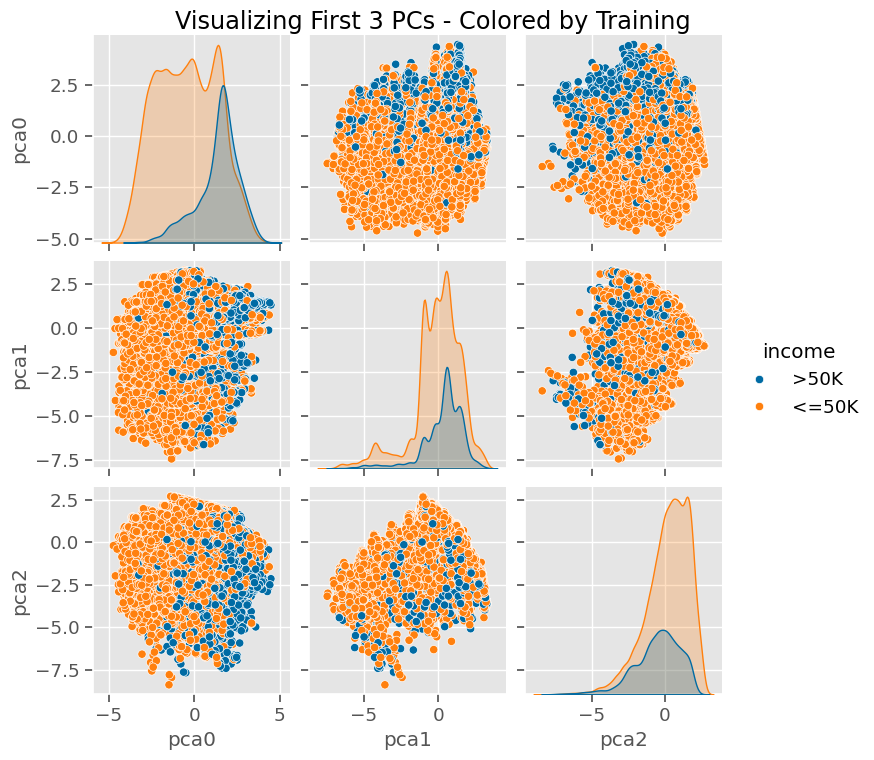

In [71]:
# Concatenate principal components with target
plot_df_pca = pd.concat([X_train_pca, y_train], axis=1)
# Plot with color coding based on target
g_pca = sns.pairplot(data=plot_df_pca,  vars=X_train_pca.columns, hue='income')
g_pca.fig.suptitle('Visualizing First 3 PCs - Colored by Training', y=1.01);

In [72]:
# Determine how much variance is explained by each PC
explained = pd.Series(pca.explained_variance_ratio_, name='Explained Variance Ratio')
explained.round(2)

,Explained Variance Ratio
0,0.07
1,0.06
2,0.05


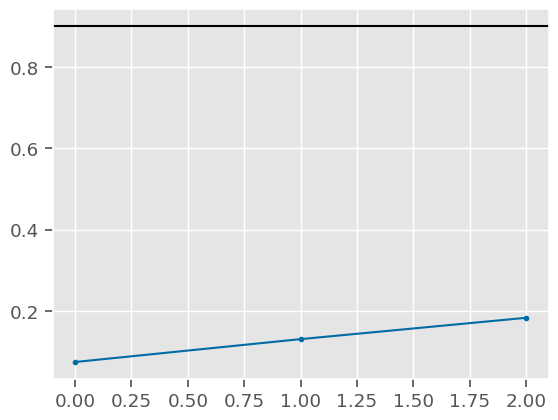

In [73]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
ax = explained.cumsum().plot(marker='.')
# add a line to mark .9 (or 90%) variance explained
ax.axhline(.9, color='k');

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.96      0.98      0.97     25481
        >50K       0.93      0.88      0.91      8435

    accuracy                           0.95     33916
   macro avg       0.95      0.93      0.94     33916
weighted avg       0.95      0.95      0.95     33916



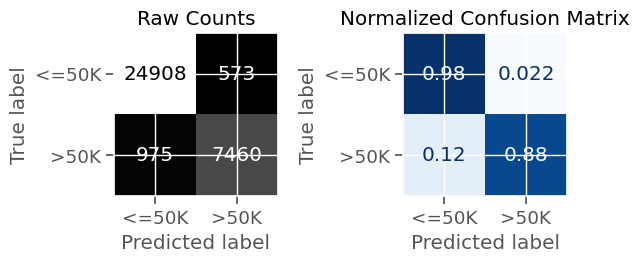


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88      8533
        >50K       0.65      0.52      0.57      2773

    accuracy                           0.81     11306
   macro avg       0.75      0.71      0.73     11306
weighted avg       0.80      0.81      0.80     11306



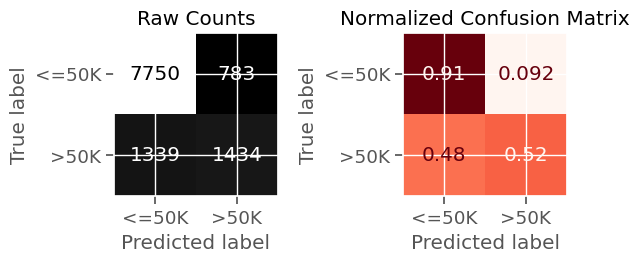

In [74]:

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

evaluate_classification(clf, X_train_pca,y_train, X_test_pca, y_test)


It seems that the Data Set is complex and PCA would not help reduce dimentionality

##PCA with SMOTE

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_pca.head()

,pca0,pca1,pca2
17438,0.505226,2.577262,-3.011450
38988,-1.545831,1.584378,-0.759944
11148,-2.804437,0.389307,1.569925
29776,1.768988,0.022233,0.543347
36242,-0.289779,1.876086,-4.000775


In [77]:
X_train_pca.describe().round(2)

,pca0,pca1,pca2
count,33916.00,33916.00,33916.00
mean,-0.00,-0.00,0.00
std,1.83,1.59,1.53
min,-4.73,-7.43,-8.40
25%,-1.51,-0.80,-0.86
50%,0.15,0.32,0.20
75%,1.51,1.02,1.16
max,4.48,3.27,2.72


In [78]:
pca.explained_variance_ratio_.sum()

0.1832972693022744

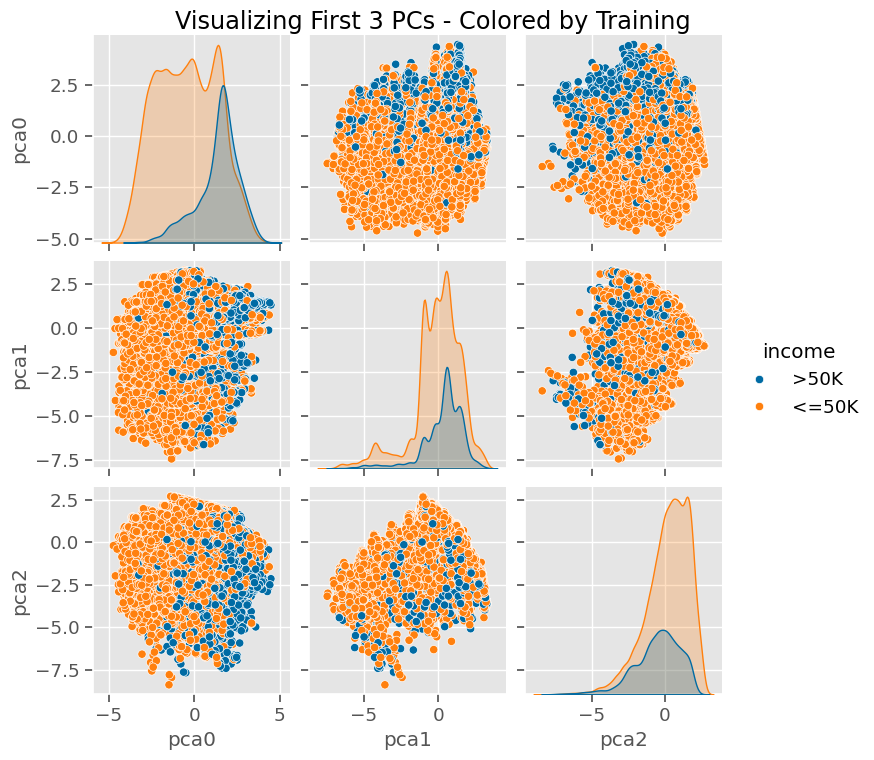

In [79]:
# Concatenate principal components with target
plot_df_pca = pd.concat([X_train_pca, y_train], axis=1)
# Plot with color coding based on target
g_pca = sns.pairplot(data=plot_df_pca,  vars=X_train_pca.columns, hue='income')
g_pca.fig.suptitle('Visualizing First 3 PCs - Colored by Training', y=1.01);

In [80]:
# Determine how much variance is explained by each PC
explained = pd.Series(pca.explained_variance_ratio_, name='Explained Variance Ratio')
explained.round(2)

,Explained Variance Ratio
0,0.07
1,0.06
2,0.05


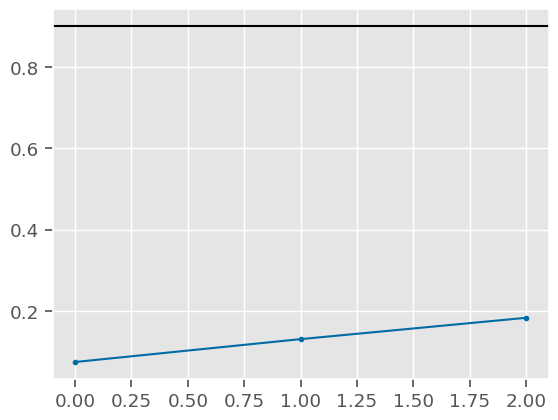

In [81]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
ax = explained.cumsum().plot(marker='.')
# add a line to mark .9 (or 90%) variance explained
ax.axhline(.9, color='k');

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.96      0.98      0.97     25481
        >50K       0.93      0.88      0.91      8435

    accuracy                           0.95     33916
   macro avg       0.95      0.93      0.94     33916
weighted avg       0.95      0.95      0.95     33916



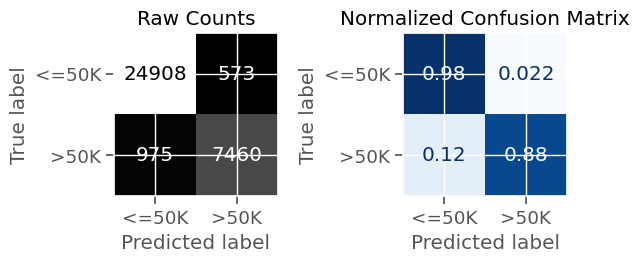


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88      8533
        >50K       0.65      0.52      0.57      2773

    accuracy                           0.81     11306
   macro avg       0.75      0.71      0.73     11306
weighted avg       0.80      0.81      0.80     11306



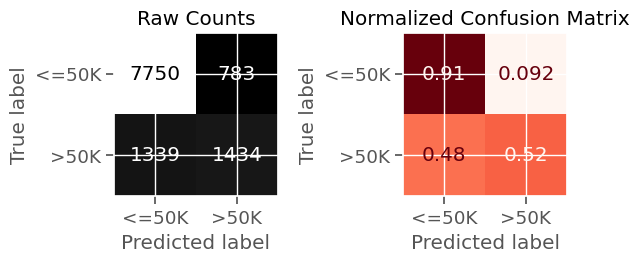

In [82]:

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

evaluate_classification(clf, X_train_pca,y_train, X_test_pca, y_test)


It seems that the Data Set is complex and PCA would not help reduce dimentionality

#Project 4 - Part 3

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

#Sci-kit Learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [84]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y)

In [102]:
y_train=y_train.replace('<=50K',0)
y_train=y_train.replace('>50K',1)
y_test=y_test.replace('<=50K',0)
y_test=y_test.replace('>50K',1)

<ipython-input-102-fa7aff286ffc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train=y_train.replace('>50K',1)
<ipython-input-102-fa7aff286ffc>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test=y_test.replace('>50K',1)


In [103]:
# check classes and balance
y_train.value_counts(normalize=True)

,proportion
income,
0,0.752152
1,0.247848


In [94]:
# define input shape
input_shape = X_train_tf.shape[1]
input_shape

45

In [95]:
# Build binary classification model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dropout(.2))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model

In [96]:
# Call our build function to build model
clf_model = build_model()

# Get model summary
clf_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 581 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

In [104]:
history = clf_model.fit(X_train_tf, y_train,
                        validation_split=.2,
                        epochs=50,
                        verbose=0, callbacks = [early_stop])

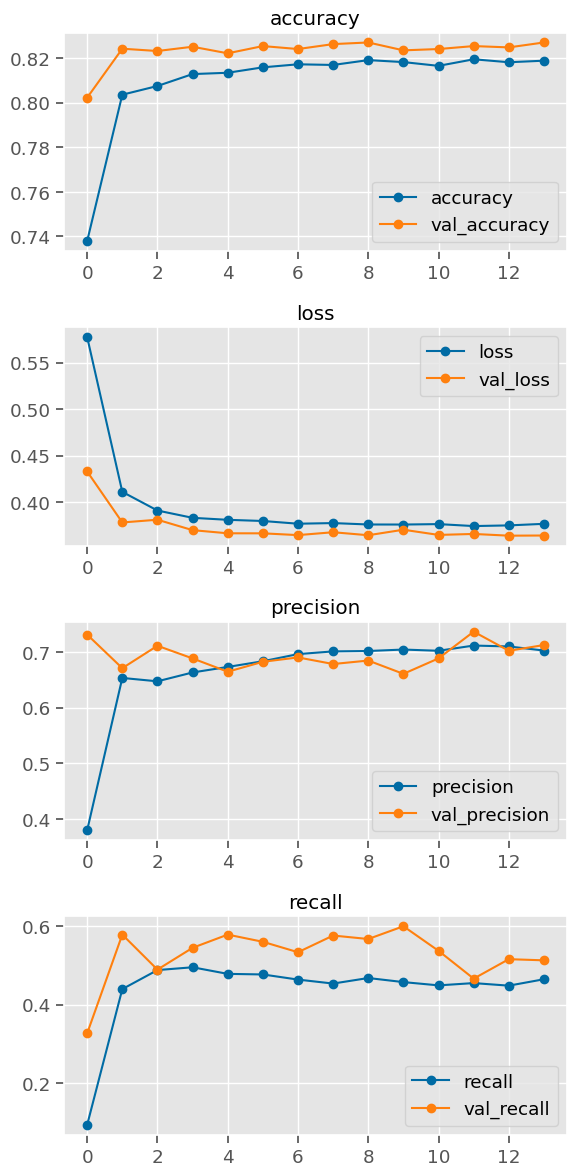

In [105]:
# plot learning history
plot_history(history);

In [106]:
# make predictions
y_pred_test = clf_model.predict(X_test_tf)
y_pred_test[:5]

354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.09601207],
       [0.05297525],
       [0.2652698 ],
       [0.39164338],
       [0.04348951]], dtype=float32)

In [107]:
# round the predictions
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      8504
           1       0.71      0.52      0.60      2802

    accuracy                           0.83     11306
   macro avg       0.78      0.72      0.74     11306
weighted avg       0.82      0.83      0.82     11306



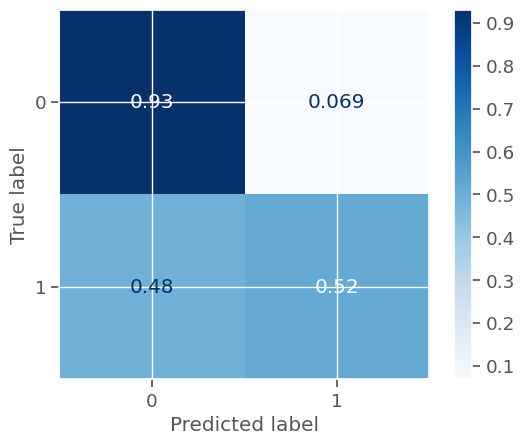

In [108]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');

#Keras Tuner

In [190]:
import tensorflow as tf

In [220]:
df2=df.copy()

In [222]:
df2['income']=df2['income'].replace({'<=50K':0 , '>50K':1})

<ipython-input-222-62088ee9a966>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['income']=df2['income'].replace({'<=50K':0 , '>50K':1})


In [223]:
y2 = df2['income']
X2 = df2.drop(columns=['income','capital-gain','capital-loss'])

In [224]:
y2.value_counts(normalize=True)

,proportion
income,
0,0.752156
1,0.247844


In [228]:
X2_train, X2_test_val, y2_train, y2_test_val = train_test_split(X2, y2, test_size = .4, random_state=42)

In [229]:
# Split the X_test_val into test and val data
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_test_val, y2_test_val, test_size = .5, random_state=42)

In [231]:
y2_val.value_counts(normalize=True)

,proportion
income,
0,0.760615
1,0.239385


In [232]:
scaler=StandardScaler()

In [233]:
preprocessor.fit(X2_train)
X2_train_tf = preprocessor.transform(X2_train)
X2_val_tf = preprocessor.transform(X2_val)
X2_test_tf = preprocessor.transform(X2_test)
scaler.fit(X2_train_tf)
X2_train_sc = scaler.transform(X2_train_tf)
X2_val_sc = scaler.transform(X2_val_tf)
X2_test_sc = scaler.transform(X2_test_tf)


In [234]:
# Build and Compile Model within a function
def build_model():
    # Instantiate Model
    model = Sequential()
    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])
    return model

In [235]:
# Call our build function to build model
basic_model = build_model()

# Get model summary
basic_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │             460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 581 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [236]:
from keras_tuner import HyperParameters as hp
import keras_tuner as kt

In [237]:
# Build and Compile Model within a function
def build_model(hp):
    # Instantiate Model
    model = Sequential()
    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(units= hp.Int('units', min_value=10, max_value=50, step=5),
                activation = 'relu'))
    model.add(Dropout(hp.Float(name='droput_value', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])
    return model

In [238]:
# Make a folder to store results of hyperparameter tuning
import os
folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)

In [239]:
# Define tuner object
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=100,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Rookie_tuning')

In [240]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

In [241]:
# Run the tuner
epochs = 100
tuner.search(X2_train_sc, y2_train, epochs=epochs, validation_data=(X2_val_sc, y2_val), callbacks=[early_stop])

Trial 172 Complete [00h 00m 16s]
val_accuracy: 0.8324856162071228

Best val_accuracy So Far: 0.8387881517410278
Total elapsed time: 00h 35m 50s


In [242]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'units': 40,
 'droput_value': 0.2,
 'optimizer': 'nadam',
 'tuner/epochs': 34,
 'tuner/initial_epoch': 12,
 'tuner/bracket': 4,
 'tuner/round': 3,
 'tuner/trial_id': '0134'}

In [243]:
# Obtain best model
best_model = tuner.get_best_models()[0]
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 15 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 941 (3.68 KB)

 Trainable params: 941 (3.68 KB)

 Non-trainable params: 0 (0.00 B)

In [245]:
# Evaluate neural network with built in evaluation
result = best_model.evaluate(X2_test_sc, y2_test, return_dict=True)
result

283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8446 - loss: 0.3493 - precision: 0.7548 - recall: 0.5793


{'accuracy': 0.8422333002090454,
 'loss': 0.3437017500400543,
 'precision': 0.7298170328140259,
 'recall': 0.5944761037826538}

In [246]:
# Inspect results in more detail
tuner.results_summary(5)

Results summary
Results in KerasTuner/Rookie_tuning
Showing 5 best trials
Objective(name="val_accuracy", direction="max")

Trial 0144 summary
Hyperparameters:
units: 40
droput_value: 0.2
optimizer: nadam
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 4
tuner/round: 3
tuner/trial_id: 0134
Score: 0.8387881517410278

Trial 0147 summary
Hyperparameters:
units: 25
droput_value: 0.1
optimizer: rmsprop
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0143
Score: 0.8385670185089111

Trial 0132 summary
Hyperparameters:
units: 30
droput_value: 0.30000000000000004
optimizer: adam
tuner/epochs: 12
tuner/initial_epoch: 4
tuner/bracket: 4
tuner/round: 2
tuner/trial_id: 0113
Score: 0.8381247520446777

Trial 0133 summary
Hyperparameters:
units: 25
droput_value: 0.1
optimizer: rmsprop
tuner/epochs: 12
tuner/initial_epoch: 4
tuner/bracket: 4
tuner/round: 2
tuner/trial_id: 0122
Score: 0.8381247520446777

Trial 0143 summary
Hyperparameters:
units: 25
dropu